# Loan Approval Prediction

Importing Libraries :-

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stest
from scipy import stats
import statsmodels
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Dataset Analysis :-

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

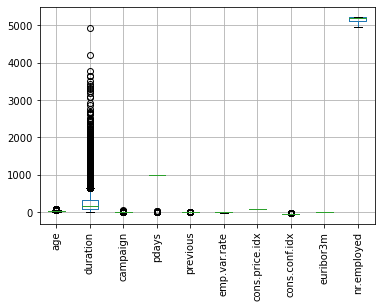

In [6]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

Univariate Analysis :-

Categorical -

In [7]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


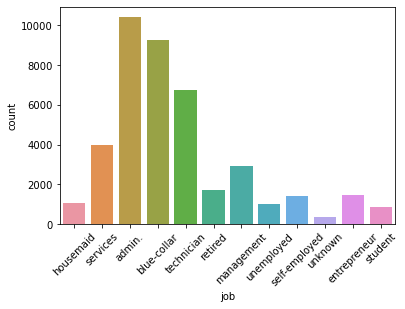

In [8]:
sns.countplot(df.job)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


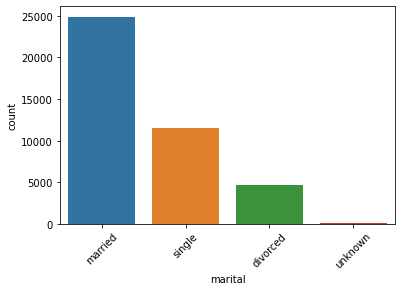

In [9]:
sns.countplot(df.marital)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


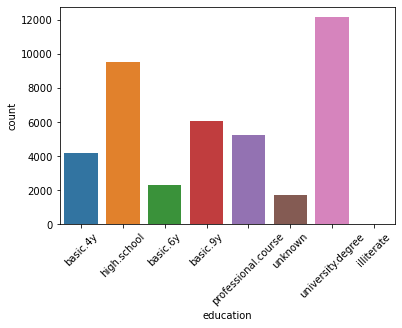

In [10]:
sns.countplot(df.education)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


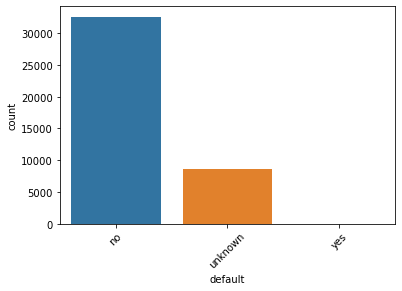

In [11]:
sns.countplot(df.default)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


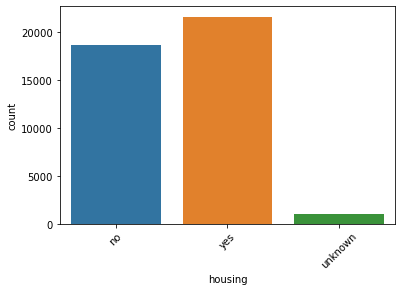

In [12]:
sns.countplot(df.housing)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


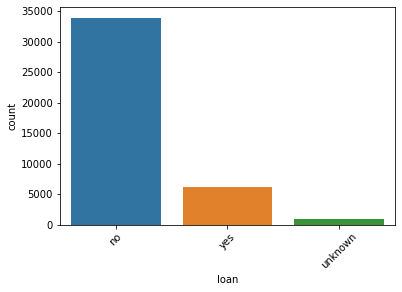

In [13]:
sns.countplot(df.loan)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


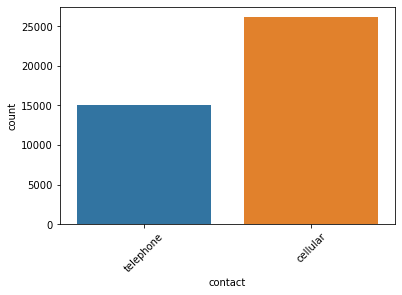

In [14]:
sns.countplot(df.contact)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


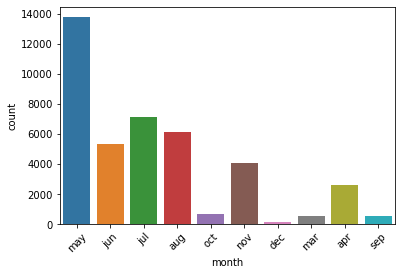

In [15]:
sns.countplot(df.month)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


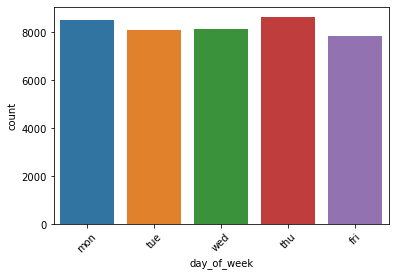

In [16]:
sns.countplot(df.day_of_week)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


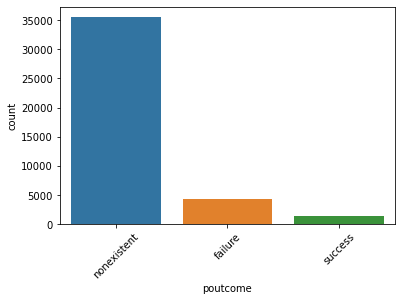

In [17]:
sns.countplot(df.poutcome)
plt.xticks(rotation=45)
plt.show()

Numerical -

In [18]:
df.select_dtypes(exclude=['object']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


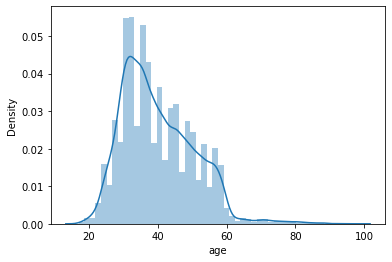

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


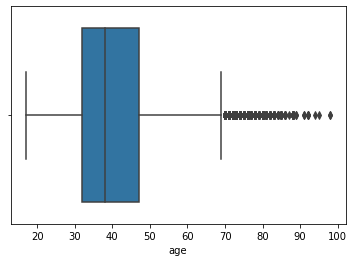

0.7846968157646645


In [19]:
sns.distplot(df.age)
plt.show()
sns.boxplot(df.age)
plt.show()
print(df.age.skew())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


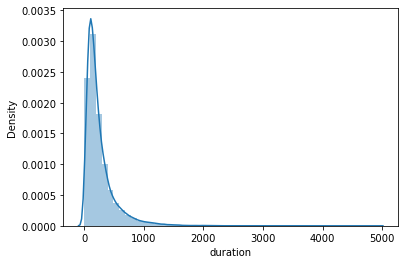

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


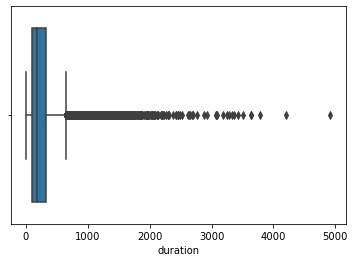

Average call duration is 258.2850101971448


In [20]:
sns.distplot(df.duration)
plt.show()
sns.boxplot(df.duration)
plt.show()
print('Average call duration is',df.duration.mean())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


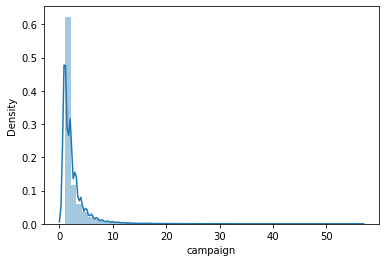

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


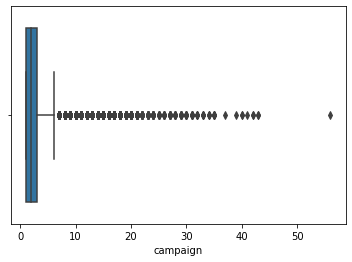

2.567592502670681


In [21]:
sns.distplot(df.campaign)
plt.show()
sns.boxplot(df.campaign)
plt.show()
print(df.campaign.mean())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


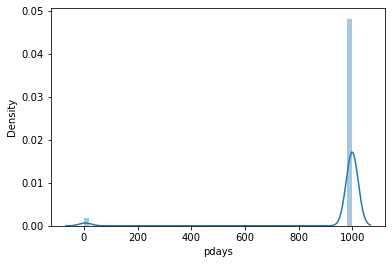

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


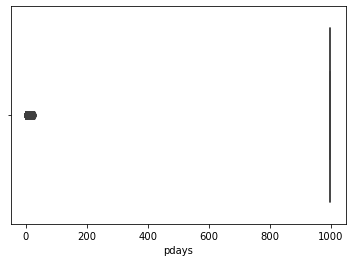

In [22]:
sns.distplot(df.pdays)
plt.show()
sns.boxplot(df.pdays)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


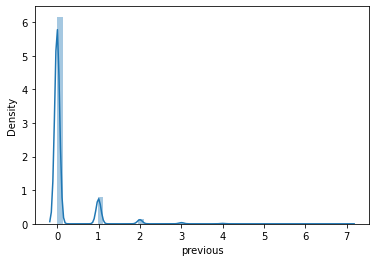

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


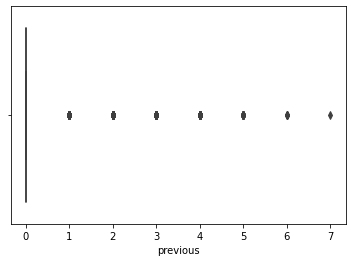

In [23]:
sns.distplot(df.previous)
plt.show()
sns.boxplot(df.previous)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


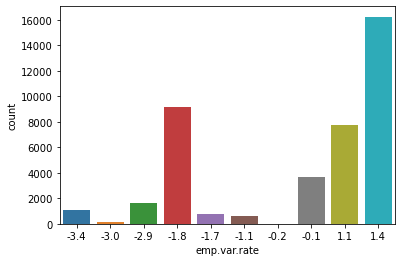

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


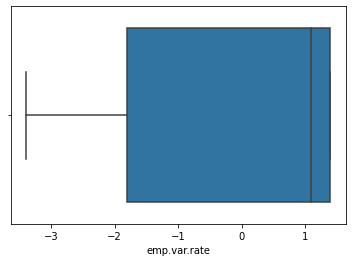

-0.7240955492472556


In [24]:
sns.countplot(df['emp.var.rate'])
plt.show()
sns.boxplot(df['emp.var.rate'])
plt.show()
print(df['emp.var.rate'].skew())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


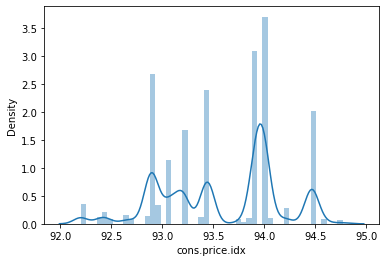

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


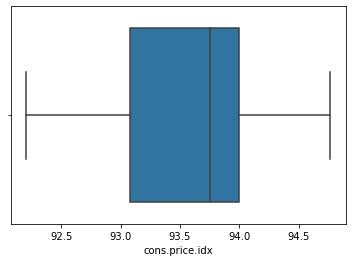

-0.23088765135788006


In [25]:
sns.distplot(df['cons.price.idx'])
plt.show()
sns.boxplot(df['cons.price.idx'])
plt.show()
print(df['cons.price.idx'].skew())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


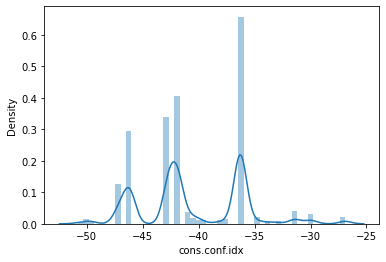

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


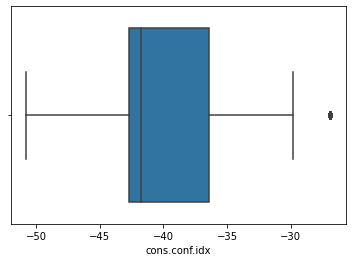

In [26]:
sns.distplot(df['cons.conf.idx'])
plt.show()
sns.boxplot(df['cons.conf.idx'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


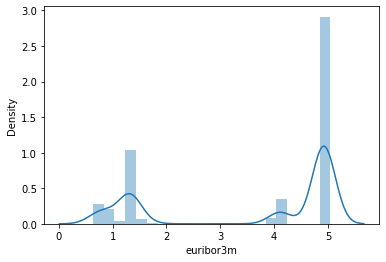

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


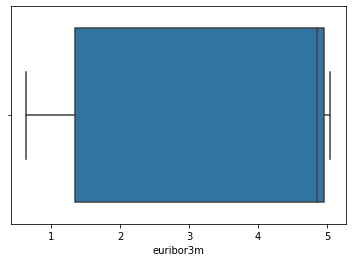

In [27]:
sns.distplot(df['euribor3m'])
plt.show()
sns.boxplot(df['euribor3m'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


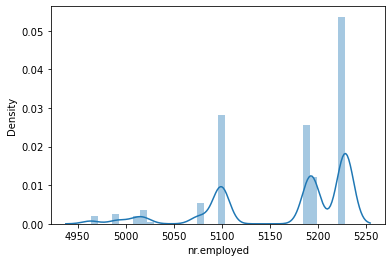

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


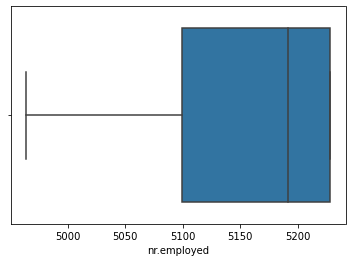

In [28]:
sns.distplot(df['nr.employed'])
plt.show()
sns.boxplot(df['nr.employed'])
plt.show()

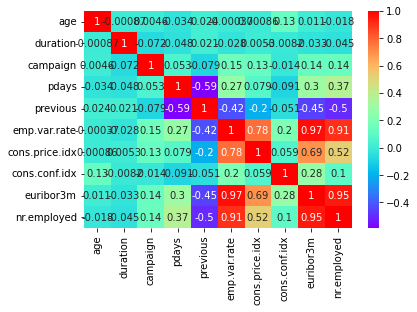

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

**Following are the inferences that we derived:**

- By looking at the heat map we are able to find some features are highly correlated.(Problem of Multicolinearity!)
- Highly collinear features have a significant correlation coefficient between them. 

**In our dataset, Following features show high multicolinearity:**
- column 'euribor3m' and 'emp.var.rate' are highly correlated i.e. 0.97
- column 'euribor3m' and 'nr.employed' are highly correlated i.e. 0.95
- column 'emp.var.rate' and 'cons.pri.idx' are corrrelated i.e. 0.78
- column 'pdays' and 'previous' are correlated i.e. 0.59

Thus, in order to remove multicolinearity, out of the 3 highly collinear features (correlation > 0.7) we would drop "emp.var.rate" for model prediction , since it has lowest correlation coefficient with the target in comparison to "euribor3m" and "nr.employed".

Further, pdays column would be used for feature extraction (discussed ahead), so it's correlation with previous would not pose a problem.

Bivariate Analysis :-

- All the variables with target variable
- Numerical Column with Numerical Column
- Categorical column with Categorical column

Numerical Vs Numerical -

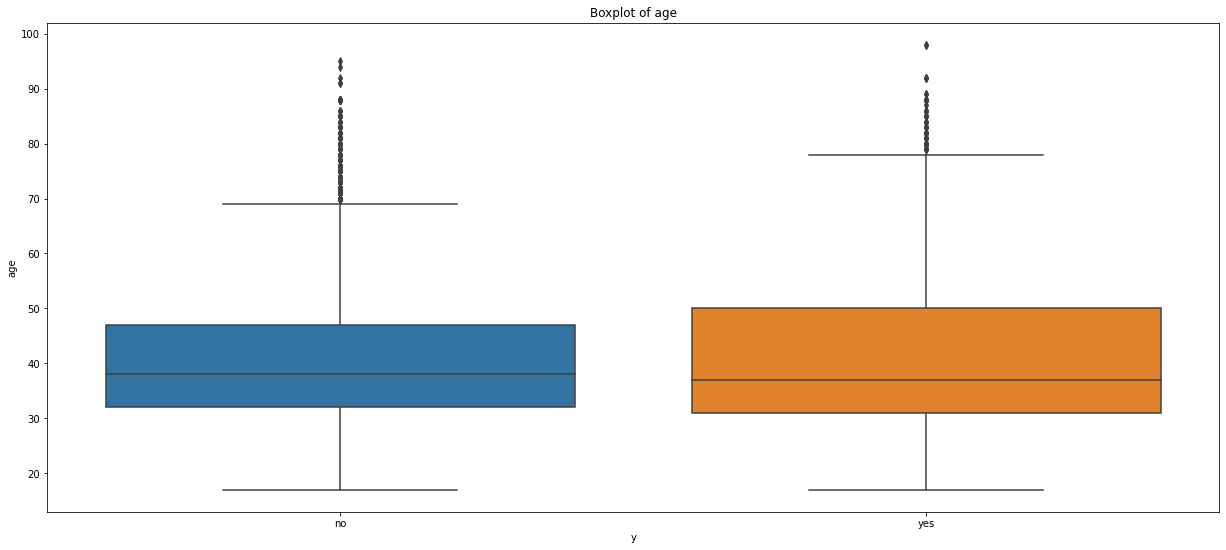

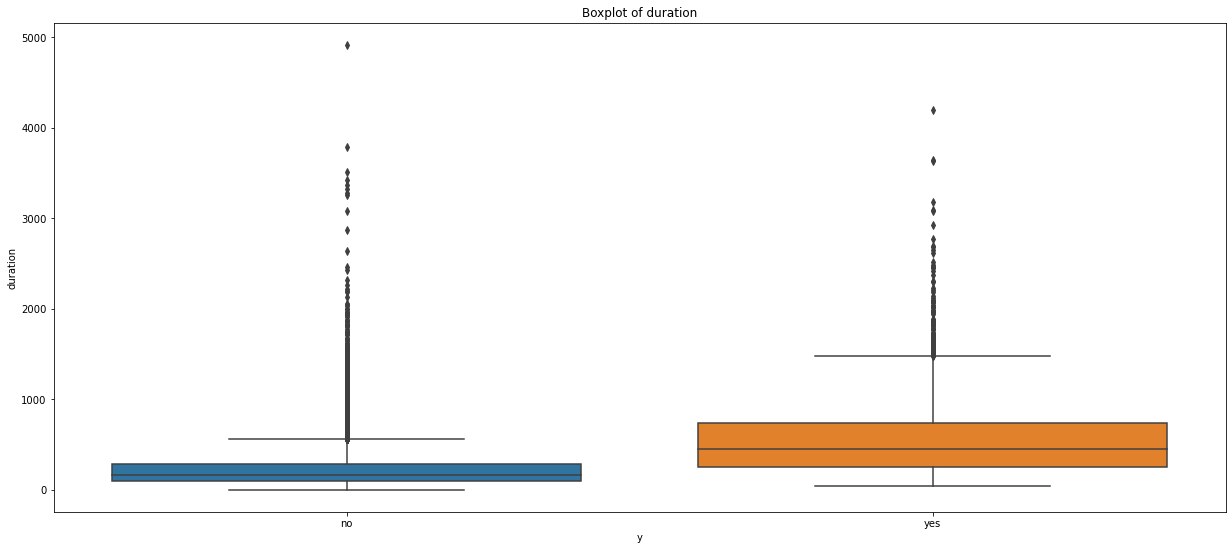

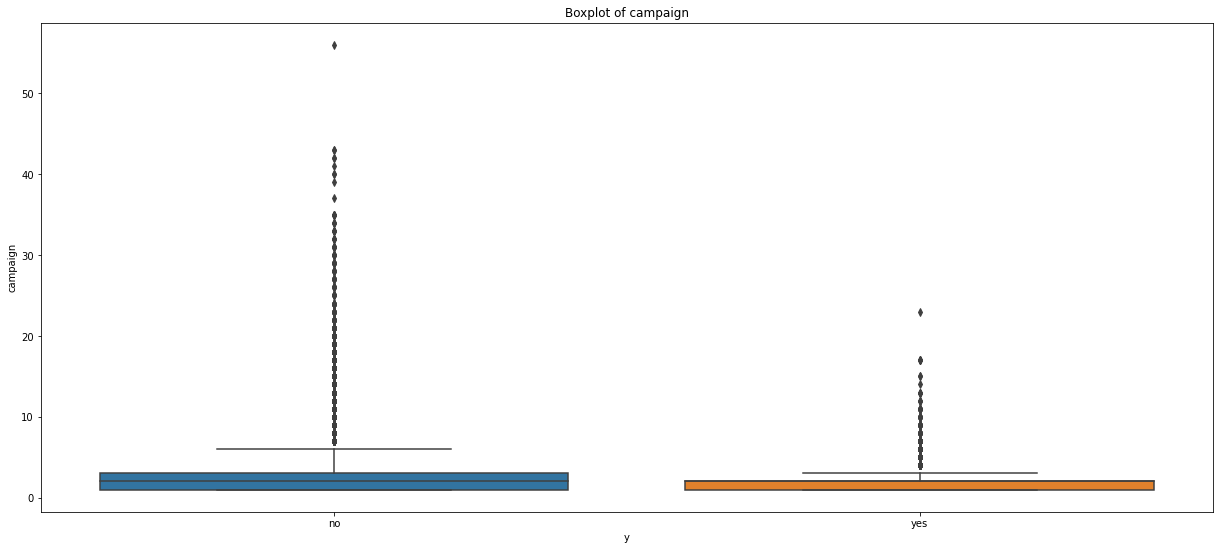

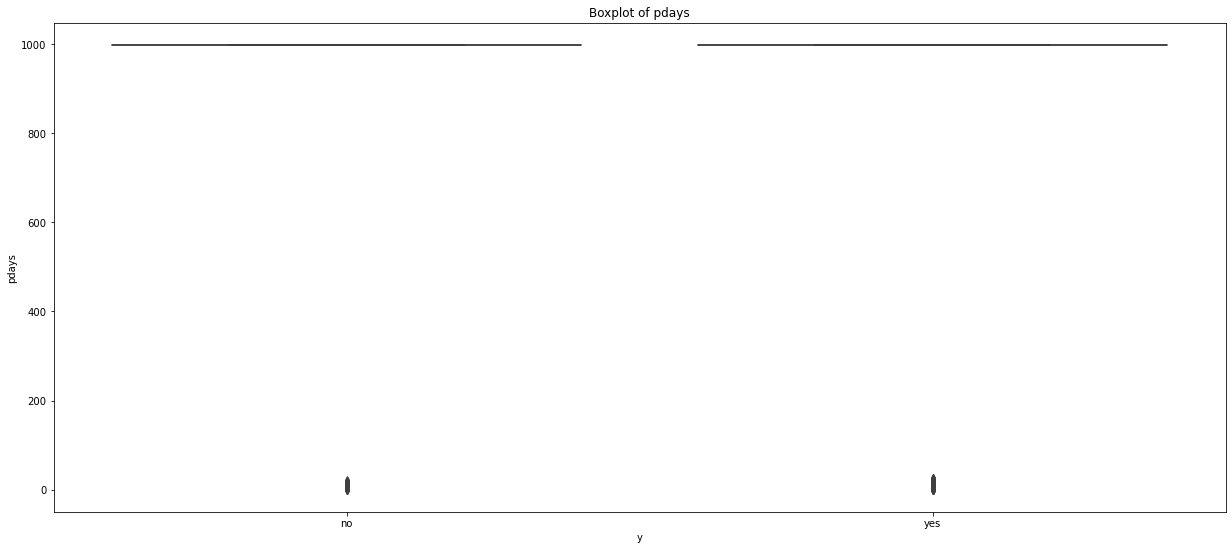

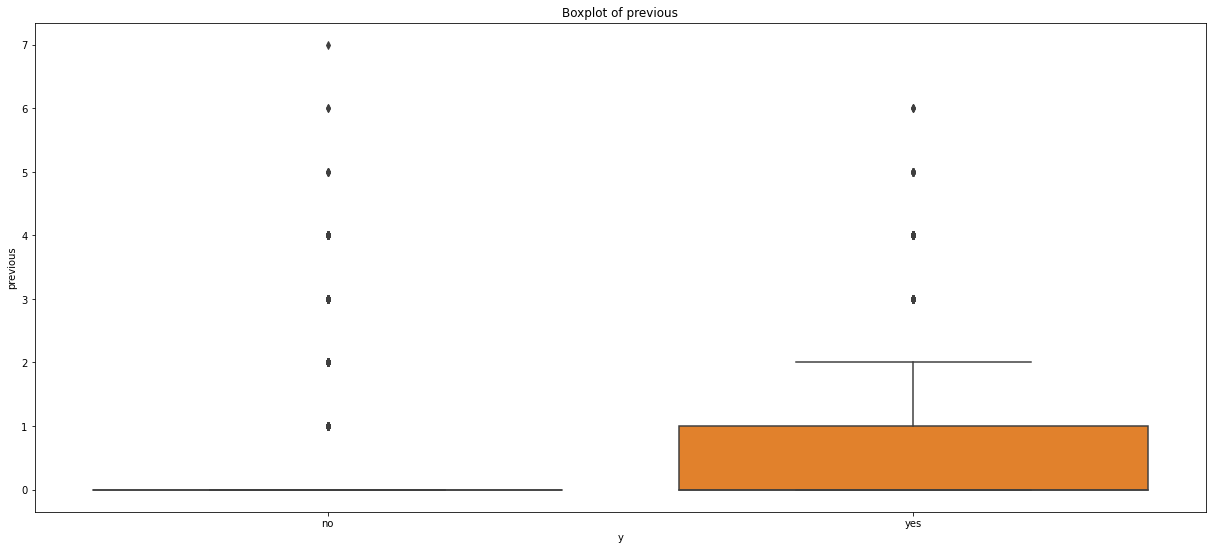

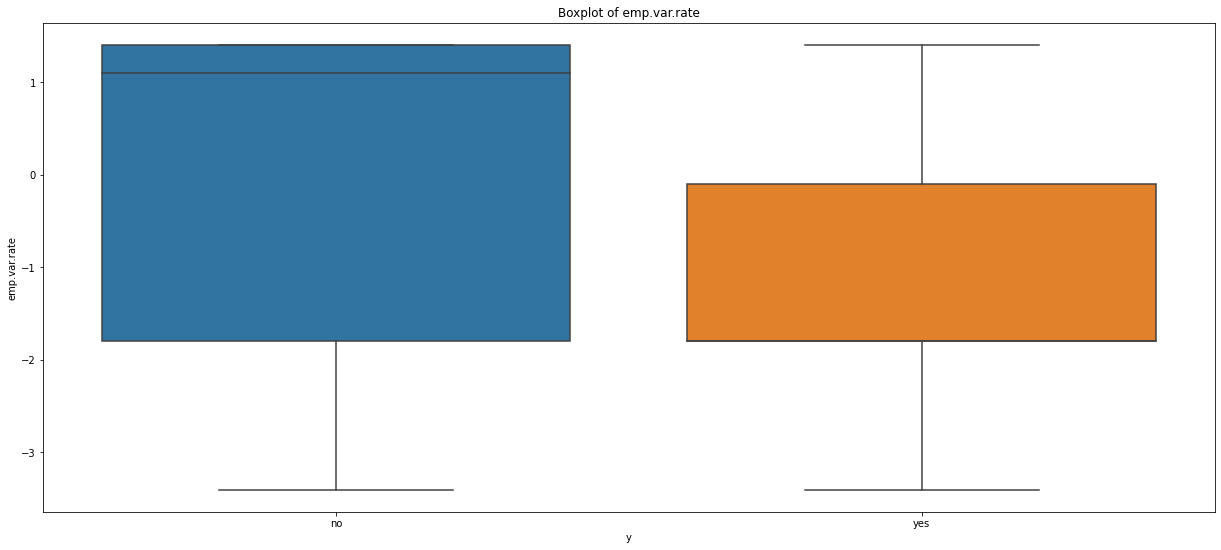

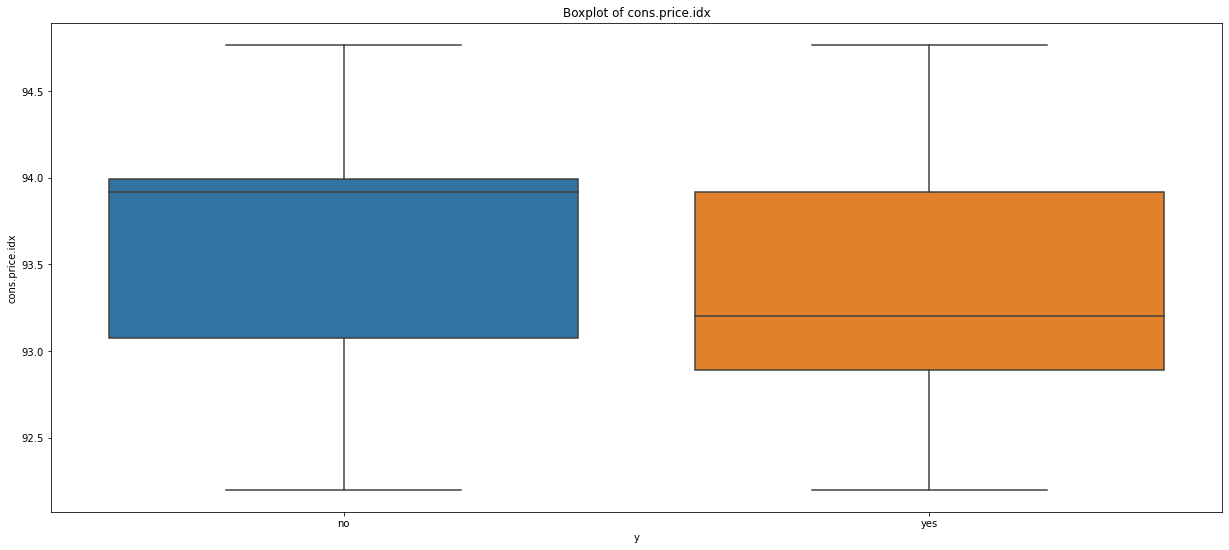

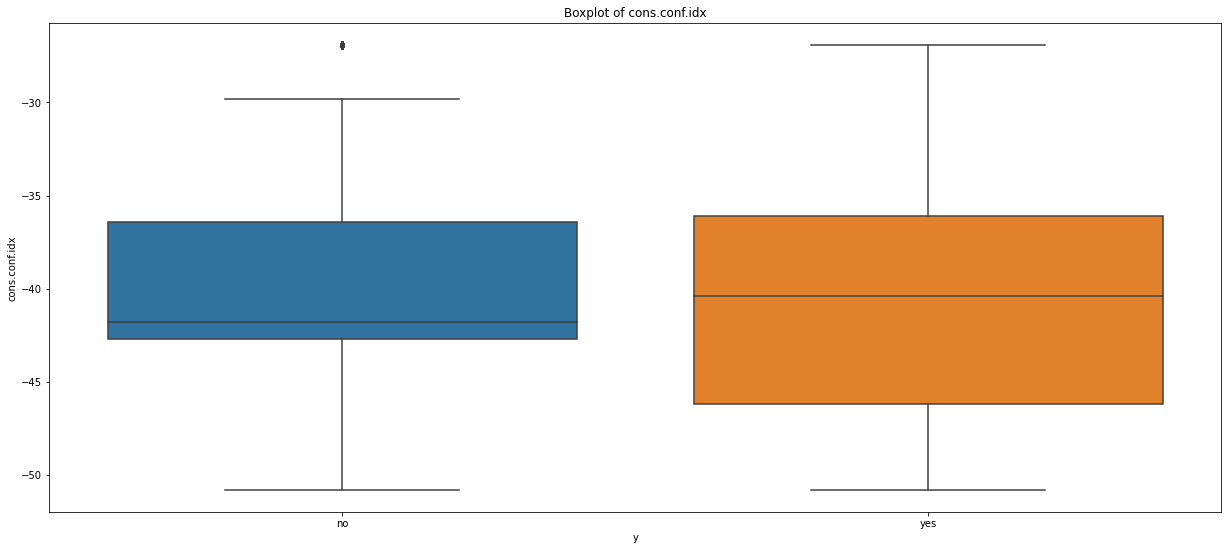

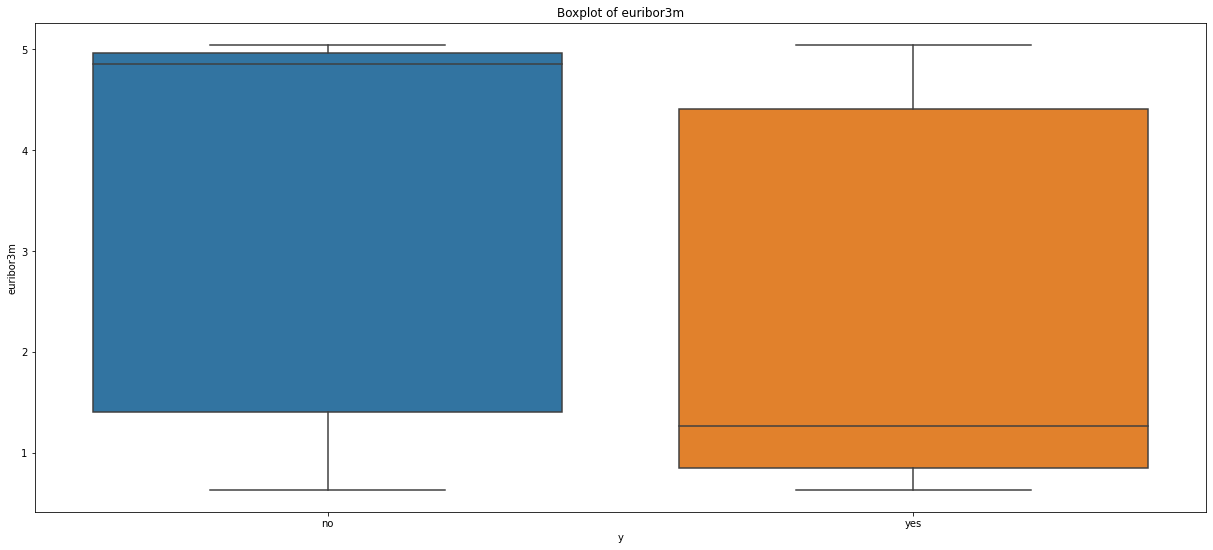

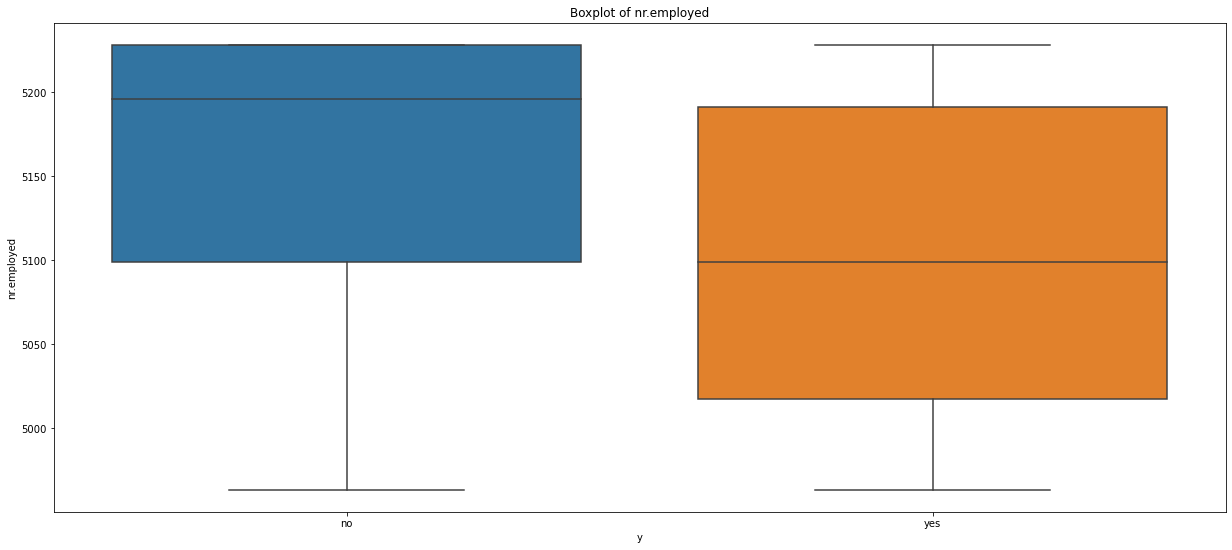

In [30]:
num= ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i in num:
    plt.figure(figsize=(21,9))
    sns.boxplot(x = df.y,y=i,data=df)
    plt.title('Boxplot of ' +i)
    plt.show()

1.  Age vs. Target: From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

2. Duration vs Target : From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

3. Campaign : From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median campaign of around 3-4 And the boxplot for both the classes overlap quite a lot, which means that duration isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

4. pDays : So, from the boxplot of the pDays we can't conclude anyting evident, as it is vague.

5. Previous : So from this boxplot we can clearly see that, people who were contacted before are having high chances of Subscribing the term Deposit

6. Euribor3m : From the above plot, we can clearly see the difference in median for both the classes. This indicates that the feature can be very useful for our case study. But we can validate the assumption only by applying models and extracting feature importance.


Categorical Vs Categorical -

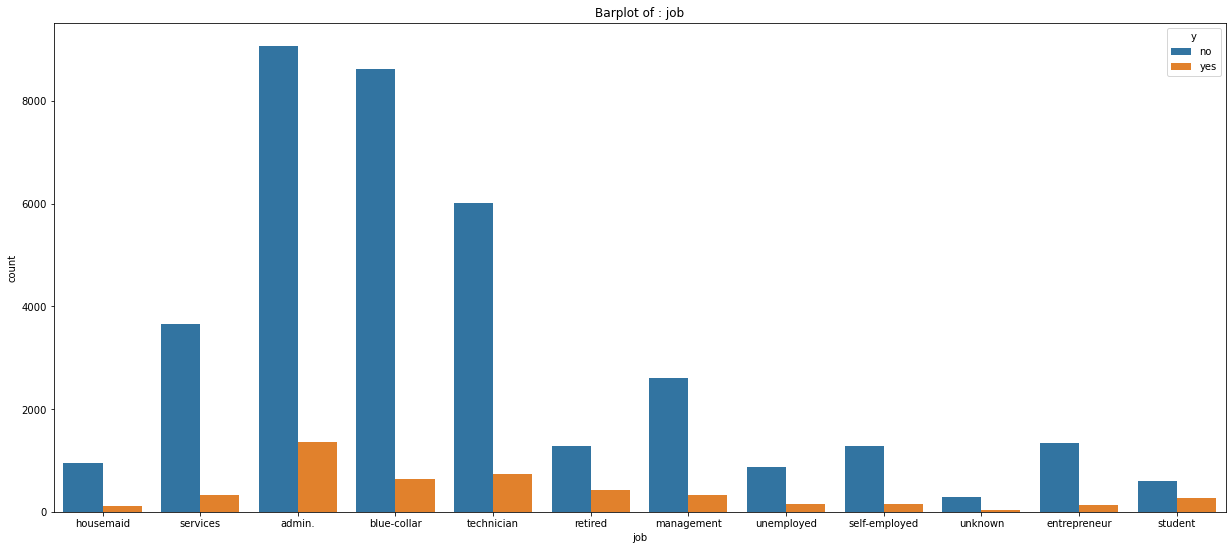

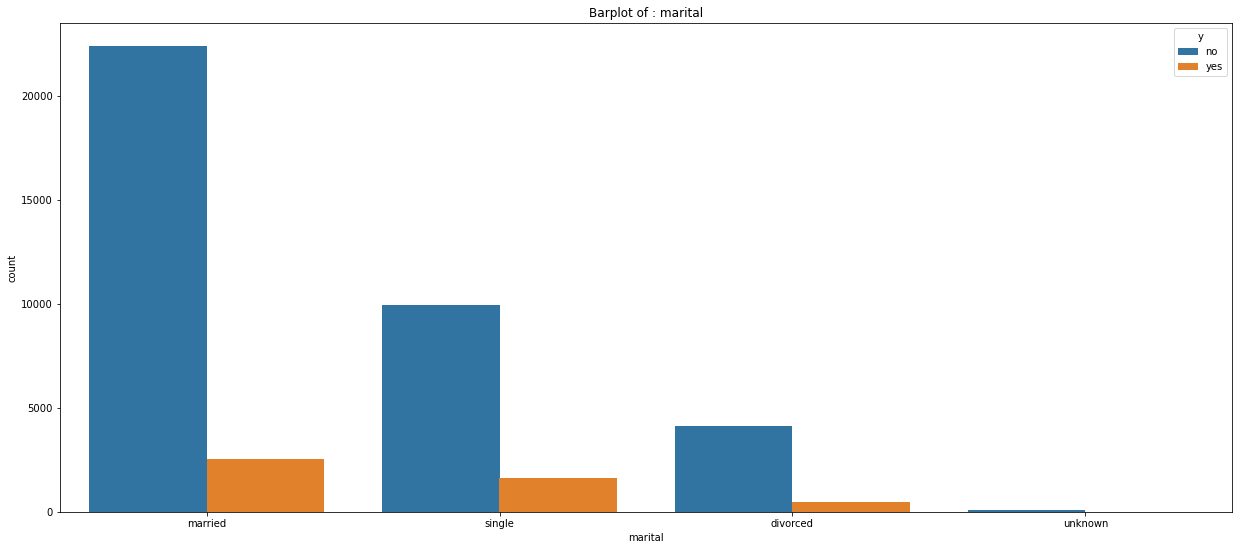

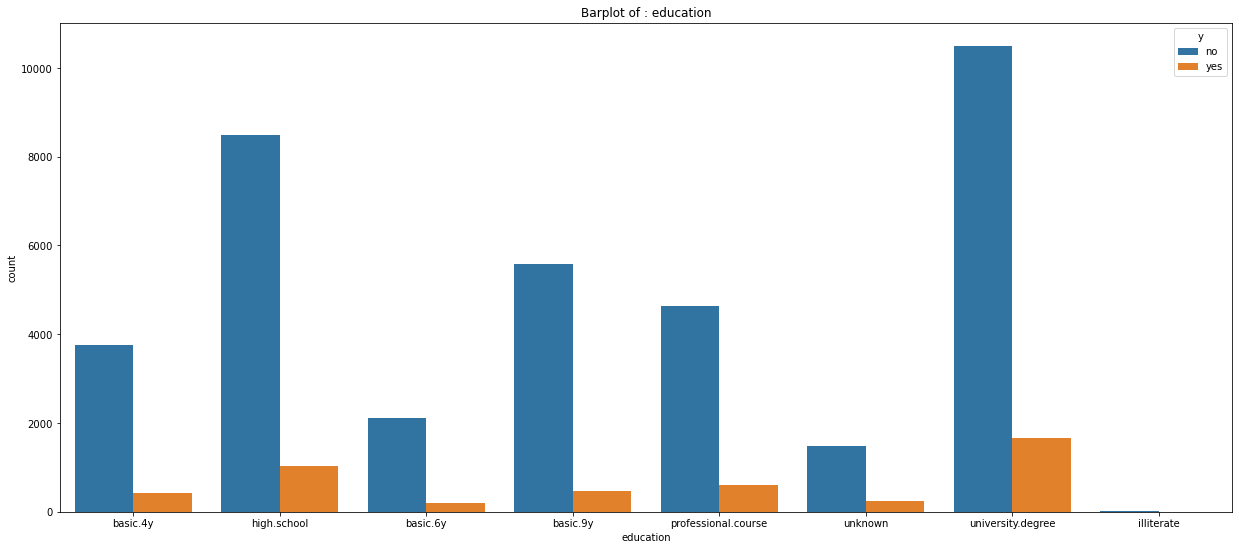

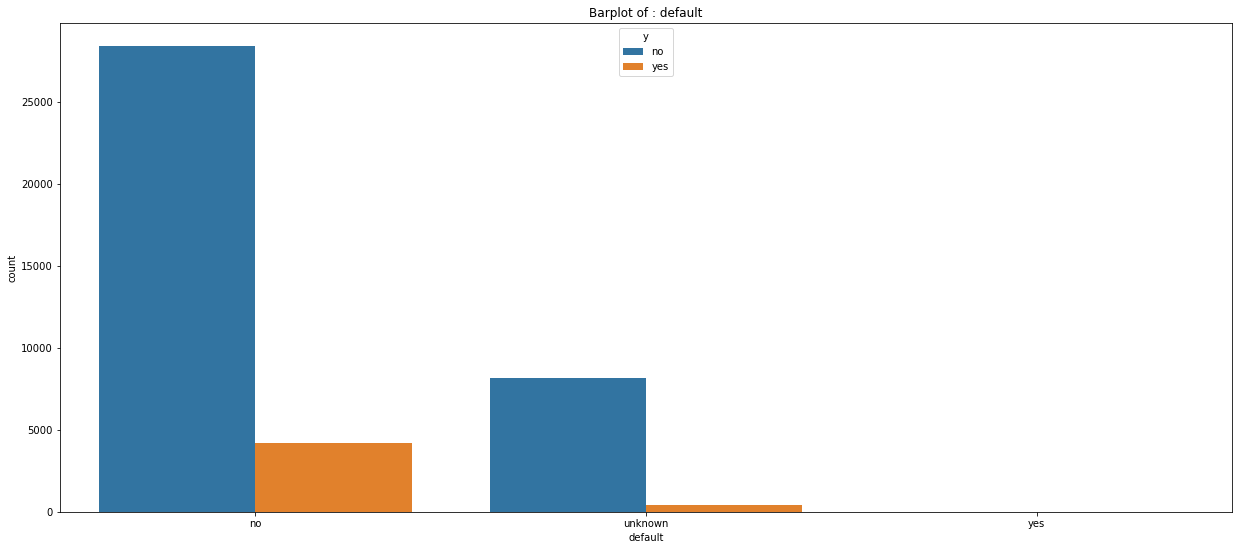

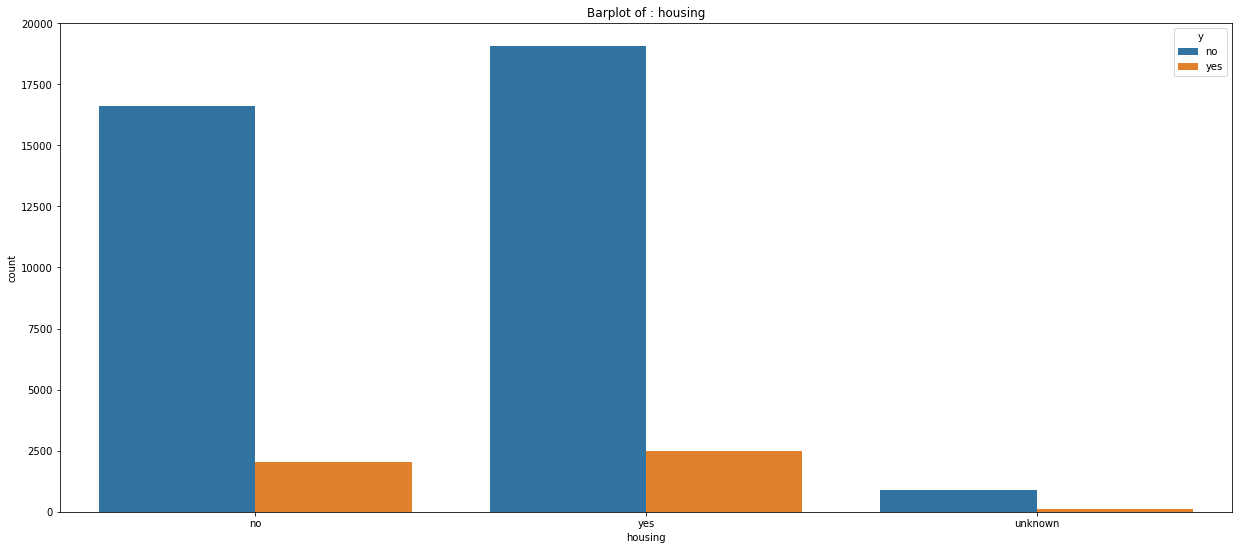

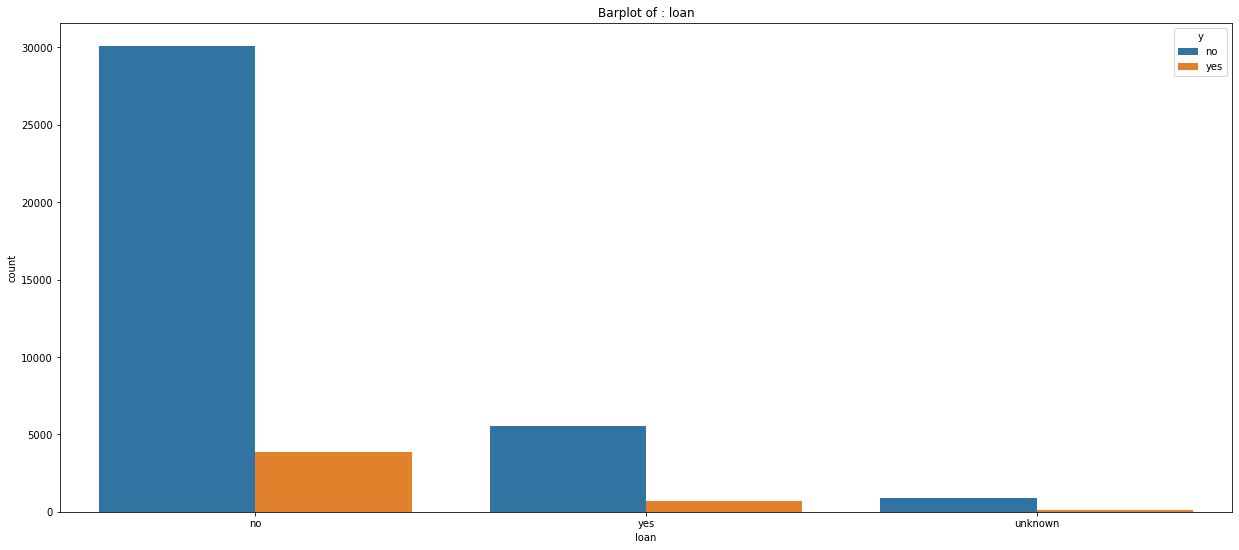

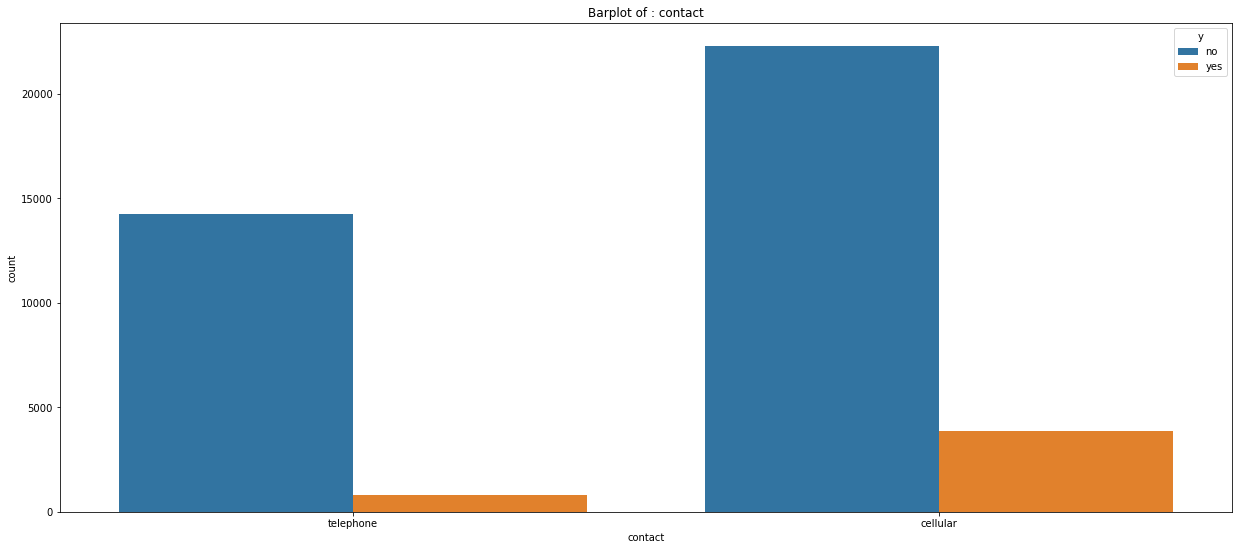

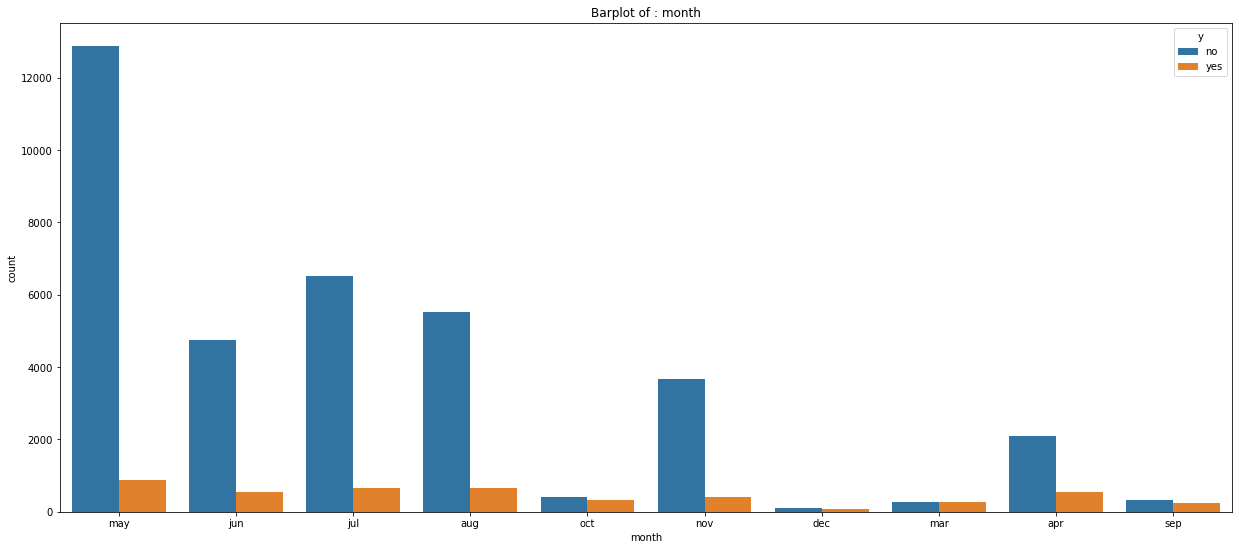

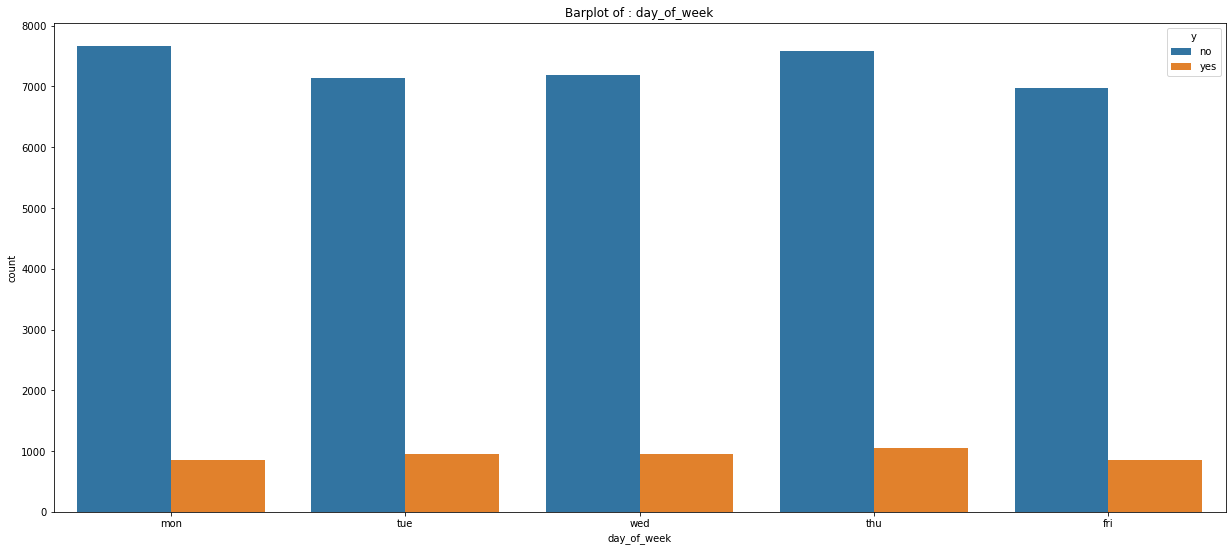

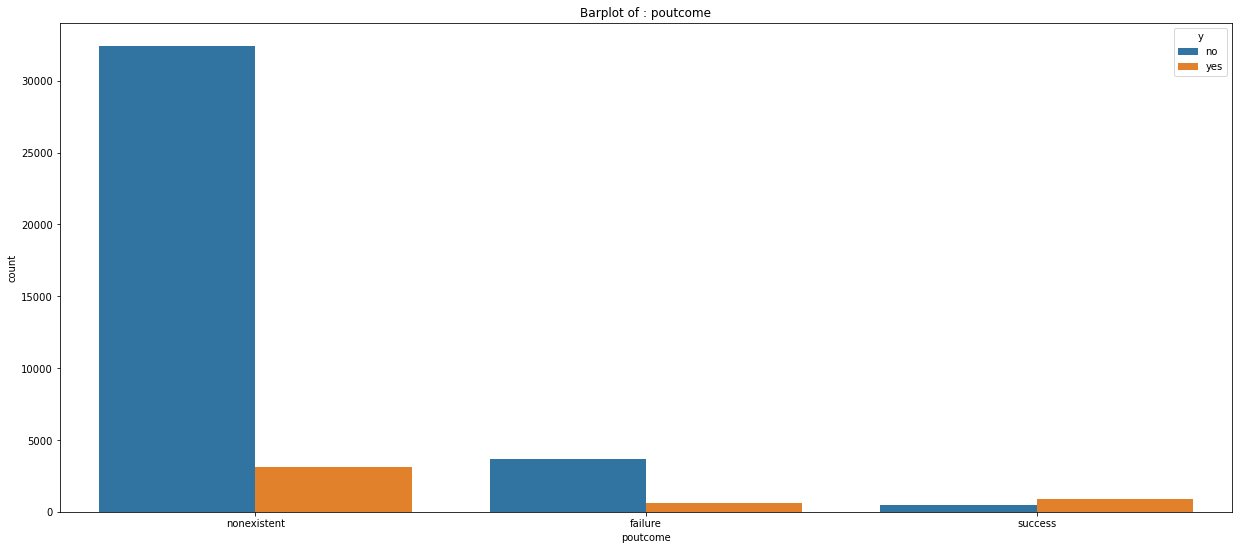

In [31]:
categ= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categ:
    plt.figure(figsize=(21,9))
    sns.countplot(x = i, data = df, hue = 'y')
    plt.title('Barplot of : '+i)
    plt.show()

1. Job : From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

2. Marital : Majority of the customers are married. Followed by Single, divorced and unknown., who subscribed to the term deposit

3. Education : Customers who are in High School or having university degree , has subscribed most to the term deposit 

4. Housing : As we can see from the above plot, majority of the customers have a housing loan.

5. Default: Denotes if the customer has credit in default or not. The categories are yes, no and unknown.

6. Day-of-Week : As we can see clearly from the above plot that, all the days have the similar distribution for both the classes. 17–18% of the customers on any given day refuse to subscribe to a term deposit, and 2.1–2.5% of customers agrees to subscribe. With this we can deduce that this feature will not be very helpful in predicting the target variable.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate', ylabel='cons.price.idx'>

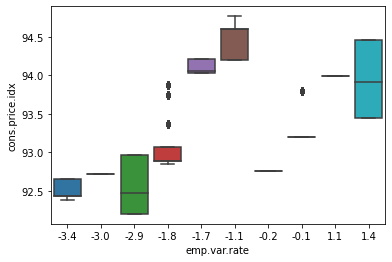

In [32]:
sns.boxplot(df['emp.var.rate'],df['cons.price.idx'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

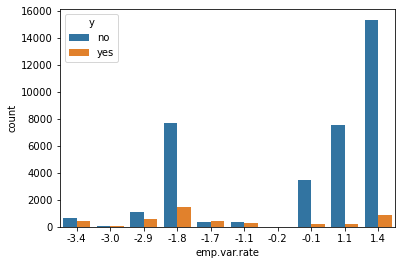

In [33]:
sns.countplot(df['emp.var.rate'],hue=df.y)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate', ylabel='euribor3m'>

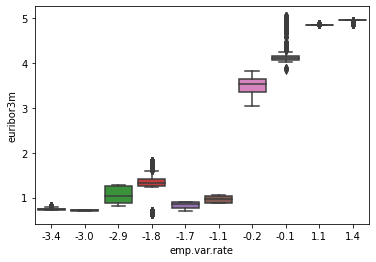

In [34]:
sns.boxplot(df['emp.var.rate'],df['euribor3m'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate', ylabel='euribor3m'>

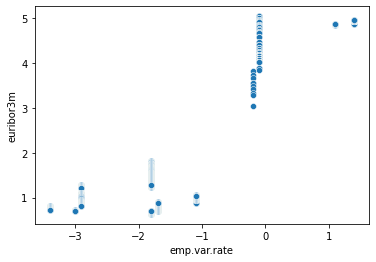

In [35]:
sns.scatterplot(df['emp.var.rate'],df['euribor3m'])

Target Variable -

In [36]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [37]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

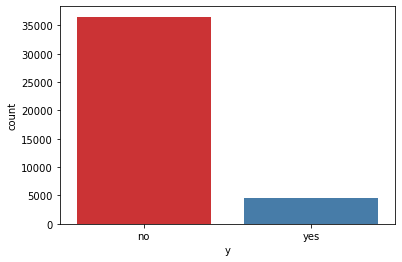

In [38]:
#Distribution of target variable 
sns.countplot(x="y",data=df,palette="Set1")
plt.show()

Thus there are 36548 people subscribed to term deposit and 4640 are not subscribed to term deposit.

In [39]:
df2=df.copy()

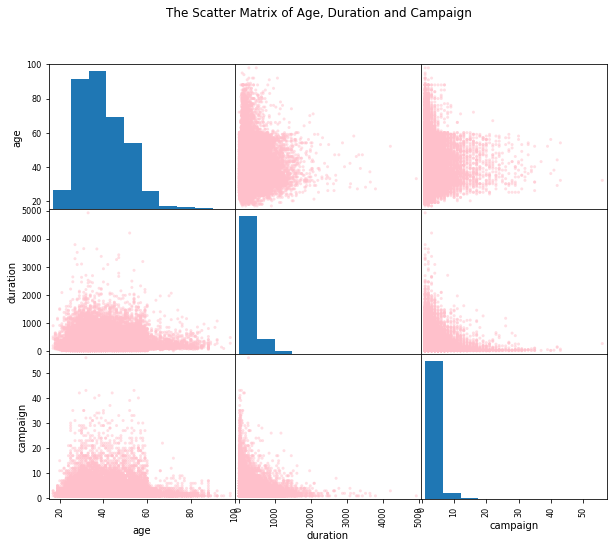

In [40]:
from pandas.plotting import scatter_matrix
sc_matrix = scatter_matrix(df2[['age','duration','campaign']],figsize=(10,8),color="pink")

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.show()

Outlier Treatment :-

In [41]:
df.shape

(41188, 21)

We are doing the outlier treatment on the data on the basis of the Quantile Treatment

In [42]:
df1=df.copy()

In [43]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_17220\328800999.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


(30360, 21)

Chi square test (For categorical Features)

- Ho: There is no relationship between two categorical columns
- Ha: There is relationship between categorical columns


**Question**- Is there any relationship between categorical columns and people who subscribed to the term deposit?

In [44]:
col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [45]:
for i in col:
    response=pd.crosstab(index=df[i], columns=df.y)
    (chi2,p, dof,_) = stats.chi2_contingency([response.iloc[0].values,response.iloc[1].values])
    print(i)
    print('Chi2',chi2)
    print('PValue',p)
    print('DOF',dof)
    print('\n')

job
Chi2 198.53256818316754
PValue 4.365802887818895e-45
DOF 1


marital
Chi2 0.09677292636058074
PValue 0.7557371658860872
DOF 1


education
Chi2 6.957703850566789
PValue 0.008345907290855374
DOF 1


default
Chi2 405.39831910178685
PValue 3.6796614181064875e-90
DOF 1


housing
Chi2 0.0003259765284992322
PValue 0.9855951204147657
DOF 1


loan
Chi2 0.22082987794381356
PValue 0.6384083192709162
DOF 1


contact
Chi2 862.3183642075705
PValue 1.5259856523129964e-189
DOF 1


month
Chi2 152.82925780495017
PValue 4.1743464815318017e-35
DOF 1


day_of_week
Chi2 3.158825118304431
PValue 0.07551751375783097
DOF 1


poutcome
Chi2 129.12809264596456
PValue 6.357994063290516e-30
DOF 1




p value is greater than alpha(assumed 0.05) for marital,housing,loan,dayofweek. Hence we fail to reject the null hypothesis and thus there is not a relationship between these categorical features and target variable.

p value is lesser than alpha(assumed 0.05) for job,education,default,contact,month,poutcome. Hence we reject the null hypothesis and thus there is a relationship between these categorical features and target variable.

Statistical testing for numerical features -

In [46]:
num= ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [47]:
for i in num:
    x=df[df['y']=='yes'][i]
    z=df[df['y']=='no'][i]
    Stats, p_val=stest.ztest(x1=x,x2=z,value = 0, alternative = 'two-sided')
    if p_val > 0.05:
        print('For feature: {}, P_value is {} it is not significant'.format(i,p_val))
    
    else:
        print('For feature: {}, P_value is {} it is significant'.format(i,p_val))
    print('\n')        
    

For feature: age, P_value is 6.739434944311709e-10 it is significant


For feature: duration, P_value is 0.0 it is significant


For feature: campaign, P_value is 1.6388766589153034e-41 it is significant


For feature: pdays, P_value is 0.0 it is significant


For feature: previous, P_value is 0.0 it is significant


For feature: emp.var.rate, P_value is 0.0 it is significant


For feature: cons.price.idx, P_value is 2.4384053306407898e-171 it is significant


For feature: cons.conf.idx, P_value is 6.851826878087137e-29 it is significant


For feature: euribor3m, P_value is 0.0 it is significant


For feature: nr.employed, P_value is 0.0 it is significant




Null Value Imputation -

On an abstract level, data does not contain any null values. But on detailed investigation, we have observed that 6 categorical columns namely ('job', 'marital', 'education', 'default', 'hous- ing', 'loan') contain „unknown‟ class which are nothing but missing values. So, we have re- placed the `'unknown'` entries with `np.nan` which we have filled by identifying pattern with- in the data as discussed ahead.


In [48]:
df2=df.replace('unknown',np.nan)

Percentage of missing values in DataFrame -

In [49]:
Total = df2.isnull().sum().sort_values(ascending=False)          

Percent = (df2.isnull().sum()*100/df2.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231
age,0,0.000000
poutcome,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


Pattern 1

In [50]:
(df2[df2['age']>=56].groupby('job').count()/df2[df2['age']>=56].count())['age'].sort_values(ascending=False)

job
retired          0.379397
admin.           0.141820
blue-collar      0.122278
management       0.082915
technician       0.082077
housemaid        0.051089
services         0.045226
entrepreneur     0.033222
self-employed    0.029313
unemployed       0.015913
Name: age, dtype: float64

- **As from here we can infer that Customers having age more than 56 are mostly retired**

Pattern 2

In [51]:
(df2[df2['age']<=25].groupby('job').count()/df2[df2['age']<=25].count())['age'].sort_values(ascending=False)

job
student          0.272509
blue-collar      0.196279
admin.           0.189076
services         0.147659
technician       0.102641
self-employed    0.024010
management       0.022809
unemployed       0.021008
entrepreneur     0.012005
housemaid        0.006603
retired          0.000600
Name: age, dtype: float64

- **As from here we can infer that consumers having age less than 25 are mostly students**

In [52]:
df2[df2.job.isna()]['age'].unique()

array([55, 57, 38, 43, 28, 50, 59, 49, 60, 45, 58, 52, 44, 35, 32, 46, 29,
       54, 37, 48, 30, 47, 53, 42, 36, 56, 41, 34, 26, 25, 33, 40, 51, 27,
       61, 66, 24, 62, 64, 72, 63, 78, 69, 81, 31, 65, 76, 67],
      dtype=int64)

- As from the data we can observe that the people after age of 56, are mostly retired, so we replace the People with age above as **'Retired'**

In [53]:
x=list(df2.loc[(df2.job.isna())& (df2['age']>=56)]['job'].index)

In [54]:
for i in range(len(x)):
    (df2.loc[x[i],'job'])='retired'

In [55]:
df2.loc[(df2.job.isna())& (df2['age']<25)]['job']

36412    NaN
36413    NaN
36414    NaN
36415    NaN
36416    NaN
36418    NaN
Name: job, dtype: object

For age below or equal to  25 replacing the missing value as student

In [56]:
x=list(df2.loc[(df2.job.isna())& (df2['age']<=25)]['job'].index)

In [57]:
for i in range(len(x)):
    (df2.loc[x[i],'job'])='student'

In [58]:
df2.groupby(['education'])['job'].describe()

,count,unique,top,freq
education,,,,
basic.4y,4138,11,blue-collar,2318
basic.6y,2272,11,blue-collar,1426
basic.9y,6018,11,blue-collar,3623
high.school,9480,11,admin.,3329
illiterate,18,6,blue-collar,8
professional.course,5233,11,technician,3320
university.degree,12135,11,admin.,5753


<AxesSubplot:xlabel='education', ylabel='count'>

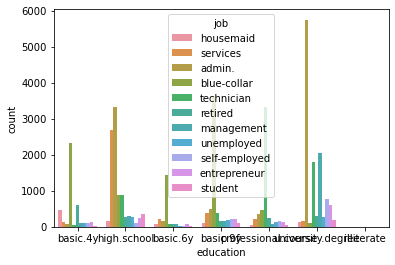

In [59]:
sns.countplot(x=df2.education,hue=df2.job)

Now according to the education  level we will impute the missing value in the job

In [60]:
df2[(df2.job.isna())]['education'].unique()

array(['university.degree', 'basic.4y', 'high.school', nan, 'basic.9y',
       'basic.6y', 'professional.course'], dtype=object)

In [61]:
x=list(df2.loc[(df2.job.isna())]['job'].index)

In [62]:
dic= {'university.degree' : 'admin.', 'basic.4y':"blue-collar", 'high.school':'admin.', np.nan:np.nan, 'basic.9y':'blue-collar',
       'basic.6y':'blue-collar', 'professional.course':'technician'}

In [63]:
for i in range(len(x)):
    (df2.loc[x[i],'job'])=dic[df2.loc[x[i],'education']]

In [64]:
x=list(df2.loc[(df2.job.isna())]['job'].index)

There are still few missing values are present in the job which we will fill by evaluating the ratio of job.

In [65]:
(df2.groupby('job').count()/df2.job.count())*100

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,,,,,,,,,,
admin.,25.529947,25.486140,24.923946,22.307674,24.972620,24.972620,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947,25.529947
blue-collar,22.728711,22.694638,21.623792,14.928570,22.142179,22.142179,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711,22.728711
entrepreneur,3.543527,3.536226,3.404804,2.810971,3.455913,3.455913,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527,3.543527
housemaid,2.579766,2.572465,2.477549,1.803402,2.509187,2.509187,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766,2.579766
management,7.116260,7.108959,6.816910,6.001606,6.943464,6.943464,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260,7.116260
retired,4.332060,4.319891,4.015673,3.324491,4.224975,4.224975,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060,4.332060
self-employed,3.458347,3.446178,3.387768,2.772031,3.360997,3.360997,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347,3.458347
services,9.659520,9.644917,9.294458,7.430212,9.413712,9.413712,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520,9.659520
student,2.148994,2.146560,1.742559,1.895885,2.093018,2.093018,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994,2.148994


In [66]:
for i in range(len(x)):
    if i <= 33:
        (df2.loc[x[i],'job'])='admin.'
    elif i <= 66:
        (df2.loc[x[i],'job'])='blue-collar'
    else:
        (df2.loc[x[i],'job'])='technician'

In [67]:
df2.loc[[299,10338,39108],'job']

299           admin.
10338    blue-collar
39108     technician
Name: job, dtype: object

In [68]:
len(x)

99

In [69]:
df2.groupby('job')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
admin.,10524.0,38.218168,8.907622,20.0,31.0,36.0,44.0,72.0
blue-collar,9372.0,39.598912,8.825496,20.0,33.0,39.0,46.0,80.0
entrepreneur,1456.0,41.723214,8.910840,20.0,35.0,41.0,49.0,69.0
housemaid,1060.0,45.500000,10.791220,21.0,37.0,45.0,53.0,85.0
management,2924.0,42.362859,9.303820,21.0,35.0,42.0,50.0,80.0
retired,1780.0,62.007303,10.379719,23.0,56.0,59.0,69.0,98.0
self-employed,1421.0,39.949331,9.422417,21.0,32.0,39.0,47.0,71.0
services,3969.0,37.926430,9.018749,20.0,31.0,36.0,45.0,69.0
student,883.0,25.879955,4.971264,17.0,22.0,25.0,29.0,47.0


In [70]:
df2[df2['age']>=56]['job'].unique()

array(['housemaid', 'services', 'admin.', 'technician', 'management',
       'retired', 'unemployed', 'blue-collar', 'entrepreneur',
       'self-employed'], dtype=object)

In [71]:
df2.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

We will impute the missing values in education by exploiting the relation between education and job. We will compute mode of education as per each job type and fill in missing values using this pattern.

In [72]:
df2.groupby('marital')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
marital,,,,,,,,
divorced,4612.0,44.899393,10.625599,24.0,37.0,44.0,52.0,95.0
married,24928.0,42.307165,10.018179,20.0,34.0,41.0,49.0,98.0
single,11568.0,33.158714,7.534553,17.0,28.0,32.0,37.0,86.0


In [73]:
df2.loc[df2['job']=='student'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,25.879955,286.695357,2.096263,839.399773,0.527746,-1.415402,93.330101,-40.201359,1.882783,5086.048811
std,4.971264,263.727603,1.760237,364.795469,0.923411,1.500692,0.716925,6.210993,1.591954,80.285258
min,17.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,22.000000,115.000000,1.000000,999.000000,0.000000,-2.900000,92.893000,-46.200000,0.869000,5017.500000
50%,25.000000,209.000000,2.000000,999.000000,0.000000,-1.800000,93.075000,-40.800000,1.262000,5099.100000
75%,29.000000,361.500000,2.000000,999.000000,1.000000,-1.100000,93.994000,-36.400000,1.459500,5099.100000
max,47.000000,2680.000000,17.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000


In [74]:
df2.loc[df2['job']=='retired'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,62.007303,271.857865,2.483146,896.313483,0.328090,-0.692247,93.433905,-38.566404,2.777953,5122.435056
std,10.379719,258.238423,2.896034,302.514204,0.705872,1.861137,0.713225,5.980853,1.954839,93.477194
min,23.000000,1.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,56.000000,115.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,0.861000,5017.500000
50%,59.000000,189.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-37.500000,1.415000,5099.100000
75%,69.000000,341.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-34.800000,4.959000,5228.100000
max,98.000000,3183.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [75]:
df2[df2.marital.isna()]['age']

40       58
390      59
413      57
1493     33
1608     32
         ..
38550    31
38579    31
39322    30
39323    30
40857    30
Name: age, Length: 80, dtype: int64

Imputing nullvalues of marital status on the basis of age.

In [76]:
df2[df2['age']<=25]['marital'].describe() 

count       1664
unique         3
top       single
freq        1360
Name: marital, dtype: object

- Out of 1664 people of age 25, 1360 is single.
- Therefore we will compute the null values of people below 25 as single.

In [77]:
x=list(df2.loc[(df2.marital.isna())]['marital'].index)

In [78]:
for i in range(len(x)):
    df2.loc[x[i],'marital'] = 'single'

In [79]:
# filling missing values of education.
df2[df2.education.isna()].describe()
df2[df2.education.isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,NaN,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,NaN,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,NaN,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,NaN,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


<AxesSubplot:xlabel='job', ylabel='count'>

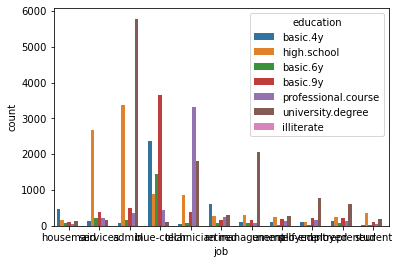

In [80]:
sns.countplot(x=df2.job,hue=df2.education)

In [81]:
df2.groupby(['job'])['education'].describe()

,count,unique,top,freq
job,,,,
admin.,10241,7,university.degree,5786
blue-collar,8885,7,basic.9y,3650
entrepreneur,1399,7,university.degree,610
housemaid,1018,7,basic.4y,474
management,2801,6,university.degree,2063
retired,1650,7,basic.4y,611
self-employed,1392,7,university.degree,765
services,3819,6,high.school,2682
student,716,6,high.school,357


In [82]:
dic1 = {'admin.':'university.degree',"blue-collar":'basic.9y','student':'high.school',np.nan:np.nan,
      'housemaid':'basic.4y','management':'university.degree','technician':'professional.course','unemployed':'university.degree'
       ,'services':'high.school','self-employed':'university.degree','retired':'basic.4y','entrepreneur':'university.degree'}

In [83]:
dic1

{'admin.': 'university.degree',
 'blue-collar': 'basic.9y',
 'student': 'high.school',
 nan: nan,
 'housemaid': 'basic.4y',
 'management': 'university.degree',
 'technician': 'professional.course',
 'unemployed': 'university.degree',
 'services': 'high.school',
 'self-employed': 'university.degree',
 'retired': 'basic.4y',
 'entrepreneur': 'university.degree'}

In [84]:
x=list(df2.loc[(df2.education.isna())]['education'].index)

In [85]:
for i in range(len(x)):
    (df2.loc[x[i],'education'])=dic1[df2.loc[x[i],'job']]

Missing values in default -

In [86]:
# df1[df1['default']=='yes'].count()
df2['default'].describe()

#  Out of 32591 values 32588 are not defaulters therefore we will replace the null values with no.

count     32591
unique        2
top          no
freq      32588
Name: default, dtype: object

In [87]:
x=list(df2.loc[(df2.default.isna())]['default'].index)

In [88]:
for i in range(len(x)):
    df2.loc[x[i],'default'] = 'no'

In [89]:
df2[df2.default.isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [90]:
# Housing 
(df2.groupby('housing').count()/df2.housing.count())*100

,age,job,marital,education,default,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
housing,,,,,,,,,,,,,,,,,,,,
no,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688,46.325688
yes,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312,53.674312


In [91]:
x=list(df2.loc[(df2.housing.isna())]['housing'].index)

In [92]:
for i in range(len(x)):
    if  i <= int(.45*len(x)):
        (df2.loc[x[i],'housing']) = 'no'
    else:
        (df2.loc[x[i],'housing']) = 'yes'

In [93]:
df2[df2.housing.isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [94]:
# Loan
(df2.groupby('loan').count()/df2.loan.count())*100

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
loan,,,,,,,,,,,,,,,,,,,,
no,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938,84.456938
yes,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062,15.543062


In [95]:
x=list(df2.loc[(df2.loan.isna())]['loan'].index)

In [96]:
for i in range(len(x)):
    if  i <= int(.82*len(x)):
        (df2.loc[x[i],'loan']) = 'no'
    else:
        (df2.loc[x[i],'loan']) = 'yes'

Final Null Values in Data after Imputation

In [97]:
Total = df2.isnull().sum().sort_values(ascending=False)          

Percent = (df2.isnull().sum()*100/df2.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


Feature Engineering

- **Age:** is not contributing significantly to term deposit, but intuitively it can be one of the important features. This might be due to specificity in age num- bers. So we decided to bin age into different age categories to generalise the data to get the more insights about the data.

In [98]:
a = [df2]
for column in a:
    column.loc[column["age"] <= 32,  'age_group'] = 'Young'
    column.loc[(column["age"] >= 33) & (column["age"] <= 40), 'age_group'] = 'Adult'
    column.loc[(column["age"] >= 41) & (column["age"] <= 50), 'age_group'] = 'Mature'
    column.loc[column["age"] >= 51, 'age_group'] = 'Retired'

Adult      12592
Young      11176
Mature     10240
Retired     7180
Name: age_group, dtype: int64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


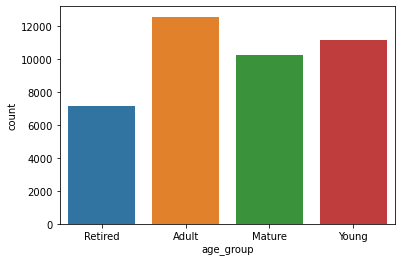

In [99]:
print(df2.age_group.value_counts())
sns.countplot(df2.age_group)
plt.show()

In [100]:
pd.crosstab(df2.age_group,df2.y,normalize='index')

y,no,yes
age_group,,
Adult,0.905257,0.094743
Mature,0.918262,0.081738
Retired,0.849304,0.150696
Young,0.863278,0.136722


In [101]:
pd.crosstab(df2.job,df2.y,normalize='index')

y,no,yes
job,,
admin.,0.870772,0.129228
blue-collar,0.931391,0.068609
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.748315,0.251685
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.681767,0.318233


In [102]:
pd.crosstab(df2.education,df2.y,normalize='index')

y,no,yes
education,,
basic.4y,0.890294,0.109706
basic.6y,0.917976,0.082024
basic.9y,0.923607,0.076393
high.school,0.887205,0.112795
illiterate,0.777778,0.222222
professional.course,0.886459,0.113541
university.degree,0.862765,0.137235


In [103]:
pd.crosstab(df2.housing,df2.y,normalize='index')

y,no,yes
housing,,
no,0.893277,0.106723
yes,0.882233,0.117767


There is a good balance between the clients who say 'yes' for term subscription as having clients housing loan(11%) and clients not having house loan(11%).

In [104]:
pd.crosstab(df2.contact,df2.y,normalize='index')

y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


Most of the clients who say 'yes' for term subscription their type of contact is CELLULAR (15%).

In [105]:
pd.crosstab(df2.month,df2.y,normalize='index')

y,no,yes
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


In [106]:
pd.crosstab(df2.day_of_week,df2.y,normalize='index')

y,no,yes
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


In [107]:
pd.crosstab(df2.poutcome,df2.y,normalize='index')

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


In [108]:
pd.crosstab(df2.marital,df2.y,normalize='index')

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859890,0.140110


In [109]:
df2['duration_min']=round(df2.duration/60,2)

Duration: last contact duration is mentioned in seconds. So, we converted it into minutes in order to reduce the bandwidth of duration values which would make them more comprehensible.

In [110]:
df2.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [111]:
# len_df2=len(df2)

In [112]:
# len_df2

In [113]:
# for i in range(len_df2):
#     if df2.loc['pdays'][i]==999:
#         df2.loc['pdays'][i]=0
#     else:
#         df2.loc['pdays'][i]=1

In [114]:
for i in range(len(df2)):
    if df2.loc[i,'pdays']==999:
        df2.loc[i,'pdays']=0
    else:
        df2.loc[i,'pdays']=1

In [115]:
df2.pdays.value_counts()

0    39673
1     1515
Name: pdays, dtype: int64

In [116]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
age_group         0
duration_min      0
dtype: int64

In [117]:
df2.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_min
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Retired,4.35
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Retired,2.48
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adult,3.77
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adult,2.52
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Retired,5.12


In [118]:
df2.drop(['age','duration'],axis=1,inplace=True)


In [119]:
df2.head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_min
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Retired,4.35
1,services,married,high.school,no,no,no,telephone,may,mon,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Retired,2.48
2,services,married,high.school,no,yes,no,telephone,may,mon,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adult,3.77
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adult,2.52
4,services,married,high.school,no,no,yes,telephone,may,mon,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Retired,5.12


In [120]:
df2['y']=df2['y'].replace({'no':0,'yes':1})


In [121]:
df2['y'].value_counts()


0    36548
1     4640
Name: y, dtype: int64

In [122]:
df2_num=df2.select_dtypes(include='number')
df2_num.columns.values
df2_num=df2_num[['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',  'duration_min']]

In [123]:
df2_obj=df2.select_dtypes(include='object')

In [124]:
df2_num.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_min
0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,4.35
1,1,0,0,1.1,93.994,-36.4,4.857,5191.0,2.48
2,1,0,0,1.1,93.994,-36.4,4.857,5191.0,3.77
3,1,0,0,1.1,93.994,-36.4,4.857,5191.0,2.52
4,1,0,0,1.1,93.994,-36.4,4.857,5191.0,5.12


In [125]:
df2_obj.head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_group
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,Retired
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,Retired
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,Adult
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,Adult
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,Retired


In [126]:
from sklearn.preprocessing import StandardScaler


In [127]:
sc=StandardScaler()
scaled_data=sc.fit_transform(df2_num)
df2_num_scaled=pd.DataFrame(scaled_data,columns=df2_num.columns)

In [128]:
df2_num_scaled.head()


,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_min
0,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.010466
1,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.422277
2,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.123754
3,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.413021
4,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.188654


In [129]:
df2_obj_encoded=pd.get_dummies(df2_obj,drop_first=True)


In [130]:
df2_model_data=pd.concat([df2_num_scaled,df2_obj_encoded],axis=1)


In [131]:
df2_model_data.head()


,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_min,job_blue-collar,...,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_group_Mature,age_group_Retired,age_group_Young
0,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.010466,0,...,0,1,0,0,0,1,0,0,1,0
1,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.422277,0,...,0,1,0,0,0,1,0,0,1,0
2,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.123754,0,...,0,1,0,0,0,1,0,0,0,0
3,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.413021,0,...,0,1,0,0,0,1,0,0,0,0
4,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.188654,0,...,0,1,0,0,0,1,0,0,1,0


In [132]:
df2_model_data.shape


(41188, 49)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
xtrain,xtest,ytrain,ytest=train_test_split(df2_model_data,df2['y'],test_size=0.3,random_state=0)


In [135]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(28831, 49)
(12357, 49)
(28831,)
(12357,)


# Oversampling to reduce the imbalance in the data 

In [136]:
ytrain.value_counts()


0    25579
1     3252
Name: y, dtype: int64

In [137]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
oversample=SMOTE()



In [140]:
X_train_smote, y_train_smote = oversample.fit_resample(xtrain, ytrain)

In [141]:
X_train_smote.shape


(51158, 49)

In [142]:
y_train_smote.value_counts()


0    25579
1    25579
Name: y, dtype: int64

In [143]:
ytrain.value_counts()


0    25579
1     3252
Name: y, dtype: int64

# Model Building

In [144]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

# On SMOTE data

In [145]:
model_smote=logreg.fit(X_train_smote,y_train_smote)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
pred_smote_logreg=logreg.predict(xtest)


In [147]:
print("Accuracy of logistic regression on test set is ",logreg.score(xtest,ytest))

Accuracy of logistic regression on test set is  0.8851663025006069


In [148]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
confusion_matrix(ytest,pred_smote_logreg)


array([[9924, 1045],
       [ 374, 1014]], dtype=int64)

In [150]:
from sklearn.metrics import confusion_matrix, classification_report

In [151]:
print(classification_report(ytest,pred_smote_logreg))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93     10969
           1       0.49      0.73      0.59      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.82      0.76     12357
weighted avg       0.91      0.89      0.89     12357



# Without SMOTE data

In [152]:
model=logreg.fit(xtrain,ytrain)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
y_pred=logreg.predict(xtest)
print("Accuracy of logistic regression on test set without smote is ",logreg.score(xtest,ytest))

Accuracy of logistic regression on test set without smote is  0.9117908877559278


In [154]:
print(classification_report(ytest,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10969
           1       0.66      0.43      0.53      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



# Using RFE for feature selection

In [155]:
logreg=LogisticRegression()



In [156]:
from sklearn.feature_selection import RFE
rfe_model=RFE(estimator=logreg)


In [157]:
model_rfe=rfe_model.fit(X_train_smote,y_train_smote)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [158]:
feat_index = pd.Series(data = model_rfe.ranking_, index = X_train_smote.columns)

In [159]:
feat_index[feat_index==1].index

Index(['emp.var.rate', 'duration_min', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_technician', 'job_unemployed',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'month_mar', 'month_may', 'month_nov', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success'],
      dtype='object')

In [160]:
# Building the model using the importnt features selected from RFE

In [161]:
X_train_smote=X_train_smote[['emp.var.rate', 'duration_min', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_technician', 'job_unemployed',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'month_mar', 'month_may', 'month_nov', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success']]

In [162]:
xtest_rfe=xtest[['emp.var.rate', 'duration_min', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_technician', 'job_unemployed',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'month_mar', 'month_may', 'month_nov', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success']]

In [163]:
xtest_rfe.shape


(12357, 24)

In [164]:
logreg=LogisticRegression()
model_smote_rfe=logreg.fit(X_train_smote,y_train_smote)

In [165]:
pred_smote_logreg_rfe=logreg.predict(xtest_rfe)
print("Accuracy of logistic regression on test set is ",logreg.score(xtest_rfe,ytest))

Accuracy of logistic regression on test set is  0.8744031722910092


In [166]:
print(classification_report(ytest,pred_smote_logreg_rfe))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     10969
           1       0.46      0.77      0.58      1388

    accuracy                           0.87     12357
   macro avg       0.72      0.83      0.75     12357
weighted avg       0.91      0.87      0.89     12357



# Using different models on SMOTE data and with features selected using RFE

# KNN Classifier

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)


knn_model = knn_classification.fit(X_train_smote, y_train_smote)
y_pred_knn=knn_model.predict(xtest_rfe)

In [168]:
print("Accuracy of logistic regression on test set of knn  is ",knn_model.score(xtest_rfe,ytest))

Accuracy of logistic regression on test set of knn  is  0.872784656470017


In [169]:
print(classification_report(ytest,y_pred_knn))


              precision    recall  f1-score   support

           0       0.96      0.89      0.93     10969
           1       0.46      0.72      0.56      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.81      0.74     12357
weighted avg       0.91      0.87      0.88     12357



# Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train_smote, y_train_smote)

In [171]:
y_pred_dt=decision_tree_classification.predict(xtest_rfe)

In [172]:
print("Accuracy of logistic regression on test set of decision tree  is ",decision_tree_classification.score(xtest_rfe,ytest))

Accuracy of logistic regression on test set of decision tree  is  0.864530225782957


In [173]:
print(classification_report(ytest,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     10969
           1       0.43      0.67      0.53      1388

    accuracy                           0.86     12357
   macro avg       0.69      0.78      0.72     12357
weighted avg       0.90      0.86      0.88     12357



# Random forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train_smote, y_train_smote)

In [175]:
y_pred_rfe=rf_classification.predict(xtest_rfe)
print("Accuracy of logistic regression on test set of RFC  is ",rf_classification.score(xtest_rfe,ytest))

Accuracy of logistic regression on test set of RFC  is  0.8784494618434895


In [176]:
print(classification_report(ytest,y_pred_rfe))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10969
           1       0.47      0.66      0.55      1388

    accuracy                           0.88     12357
   macro avg       0.71      0.78      0.74     12357
weighted avg       0.90      0.88      0.89     12357



# XGBOOST classifier

In [177]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [178]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [179]:
y_pred_XGB=xgb_model.predict(xtest_rfe)
print(classification_report(ytest,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     10969
           1       0.49      0.77      0.60      1388

    accuracy                           0.88     12357
   macro avg       0.73      0.83      0.76     12357
weighted avg       0.91      0.88      0.89     12357



In [180]:
f1_score(ytest,y_pred_XGB)

0.5971988795518207

In [181]:
f1_scores={'Model_name':["Logistic Regression","KNN classifier","Decision Treee Classifier","Random forest Classifier","XGBOOST Classifier"],
           
          'F1_score':[f1_score(ytest,pred_smote_logreg_rfe), f1_score(ytest,y_pred_knn), f1_score(ytest,y_pred_dt), f1_score(ytest,y_pred_rfe),
           f1_score(ytest,y_pred_XGB)]}

In [182]:
f1_scores

{'Model_name': ['Logistic Regression',
  'KNN classifier',
  'Decision Treee Classifier',
  'Random forest Classifier',
  'XGBOOST Classifier'],
 'F1_score': [0.5798592311857065,
  0.5604026845637583,
  0.5273856578204404,
  0.548948948948949,
  0.5971988795518207]}

In [183]:
f1_scores=pd.DataFrame(data=f1_scores,columns = ['Model_name','F1_score'])

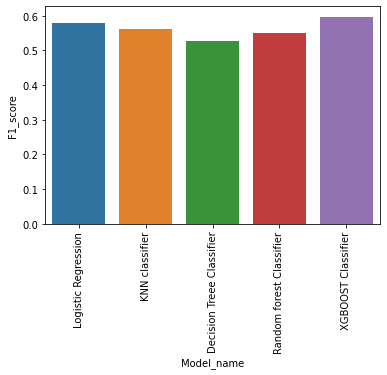

In [184]:
sns.barplot(x=f1_scores['Model_name'],y=f1_scores['F1_score'])
plt.xticks(rotation=90)
plt.show()

In [185]:
# as we can check f1-score for XGBOOST classifier is highest.
# So we would go with XGBOOST classifier model.

In [188]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],'max_depth': range(3,10),'gamma': [0, 1, 2, 3, 4]}

In [190]:
# instantiate the 'XGBClassifier' 
xgb_model = xgb.XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

In [196]:
# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [197]:
# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9} 



In [198]:
xgb_grid_model = xgb.XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),max_depth = xgb_grid.best_params_.get('max_depth'),gamma = xgb_grid.best_params_.get('gamma'))

In [199]:
xgb_model = xgb_grid_model.fit(X_train_smote, y_train_smote)

In [200]:
y_pred_xgb=xgb_grid_model.predict(xtest_rfe)

In [201]:
print(classification_report(ytest,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     10969
           1       0.48      0.76      0.59      1388

    accuracy                           0.88     12357
   macro avg       0.73      0.83      0.76     12357
weighted avg       0.91      0.88      0.89     12357



In [202]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(xtest_rfe)[:,1]
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    plt.plot(fpr, tpr)
    
    plt.title('ROC curve for Term Deposit Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))
    plt.grid(True)

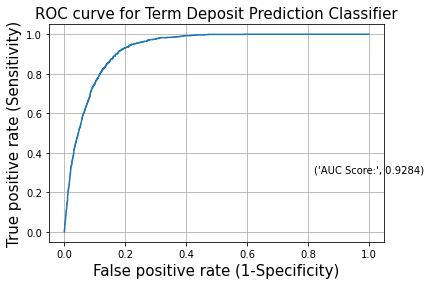

In [203]:
plot_roc(xgb_model)

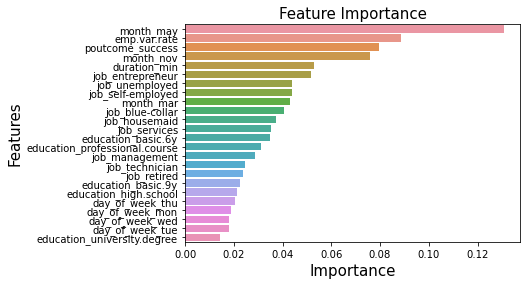

In [204]:
important_features = pd.DataFrame({'Features': X_train_smote.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

Final Output Decision Tree :-

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [208]:
# Define random forest model and hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=9, criterion='gini')
# Define hyperparameter grid for grid search
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [7, 8, 9], 'criterion': ['gini', 'entropy']}

In [209]:
# Perform grid search to find best hyperparameters
grid = GridSearchCV(estimator=rf, param_grid=param_grid)
model=grid.fit(xtrain, ytrain)
# Fit random forest model with best hyperparameters
rf = RandomForestClassifier(**grid.best_params_)
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=9)

In [210]:
# The train accuracy 
pred_model = rf.predict(xtest)

In [211]:
xtest["y"] = list(pred_model)

In [212]:
xtest["y"] = xtest["y"].replace(0,"no").replace(1,"yes")

In [213]:
xtest

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_min,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_group_Mature,age_group_Retired,age_group_Young,y
15500,0.156105,-0.195415,-0.349494,0.839061,0.591424,-0.474791,0.770116,0.845170,1.452172,1,...,0,0,0,0,1,0,0,0,0,no
29034,-0.204909,-0.195415,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,-0.040445,1,...,0,0,0,0,1,0,0,1,0,no
11199,-0.565922,-0.195415,-0.349494,0.839061,1.536429,-0.280328,0.772422,0.845170,-0.197806,1,...,0,1,0,0,1,0,0,0,0,no
22247,1.600159,-0.195415,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,-0.318141,0,...,0,1,0,0,1,0,0,1,0,no
27180,-0.565922,-0.195415,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,0.049806,1,...,0,0,0,0,1,0,1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,-0.565922,-0.195415,-0.349494,0.839061,-0.227465,0.951267,0.774152,0.845170,-0.850393,0,...,0,1,0,0,1,0,0,0,0,no
15744,-0.204909,-0.195415,-0.349494,0.839061,0.591424,-0.474791,0.771846,0.845170,1.382748,0,...,1,0,0,0,1,0,0,0,0,no
34965,-0.565922,-0.195415,-0.349494,-1.197935,-1.179380,-1.231034,-1.367190,-0.940281,-0.734686,0,...,0,0,0,0,1,0,1,0,0,no
4644,-0.565922,-0.195415,-0.349494,0.648092,0.722722,0.886447,0.713036,0.331680,-0.325084,0,...,0,0,0,1,1,0,0,0,0,no
